<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 1, Unit 2 (Assignment) --  Recap Hands-on AI I </h2>

**Authors**: Brandstetter, Schäfl<br>
**Date**: 03-16-2019

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies 
to all code within this file.

**Copyright statement**: <br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

# Exercise 0

- Import the same modules as discussed in the lecture notebook
- Check if your model versions are correct

In [5]:
import u2_utils as u2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import xgboost as xgb

from functools import partial
from IPython.display import HTML
from pathlib import Path
from PIL import Image, ImageOps
from scipy import signal
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from torch.utils.data import DataLoader, TensorDataset

In [2]:
u2.check_module_versions()

Installed Python version: 3.6 (✗)
Installed numpy version: 1.18.2 (✓)
Installed pandas version: 1.0.3 (✓)
Installed PyTorch version: 1.4.0 (✓)
Installed scikit-learn version: 0.22.1 (✓)
Installed scipy version: 1.4.1 (✓)
Installed matplotlib version: 3.2.1 (✓)
Installed seaborn version: 0.10.0 (✓)
Installed PIL version: 7.0.0 (✓)


Having difficulties such that jupyter detects the python3.7 kernel

Next Unit-Assignment python3.7 kernel wil be used.

# Exercise 1

- Load the Fashion MNIST dataset.
- Display the first 5 elements of the dataset.
- Create a training and a test dataset (ratio 7:3)
- Print the size of the full data set, the size of the training data set and the size of the test data set

In [23]:
fashion_mnist_data = u2.load_fashion_mnist()
fashion_mnist_data.head(5)

,PX_0,PX_1,PX_2,PX_3,PX_4,PX_5,PX_6,PX_7,PX_8,PX_9,...,PX_775,PX_776,PX_777,PX_778,PX_779,PX_780,PX_781,PX_782,PX_783,item_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
np.random.seed(42)
fashion_mnist_train, fashion_mnist_test = u2.split_data(fashion_mnist_data, test_size=0.25)

print(f'Full data set is of size: {fashion_mnist_data.shape[0]}')
print(f'Training subset is of size: {fashion_mnist_train.shape[0]}')
print(f'Testing subset is of size: {fashion_mnist_test.shape[0]}')

Full data set is of size: 70000
Training subset is of size: 52500
Testing subset is of size: 17500


# Exercise 2

- Downproject the training data to two dimensions 
- Visualize the ten classes in this downprojection
- For the remaining exercise create two data sets (fashion_mnist_train_pca, fashion_mnist_test_pca) which are downprojected versions of the original dataset. NOTA BENE: the downprojected dimension should be 10 now!

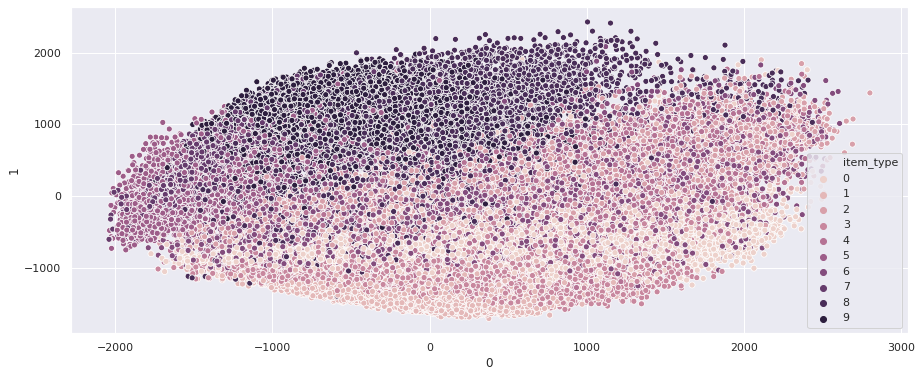

In [25]:
np.random.seed(seed=42)
fashion_mnist_train_pca = u2.apply_pca(n_components=2, data=fashion_mnist_train, target_column=r'item_type')
u2.plot_points_2d(data=fashion_mnist_train_pca, target_column=r'item_type', figsize=(15, 6))

Applying PCA on the Fashion_Mnist_Training_Split such that it reduces its features down to 10 Principal Components

In [30]:
fashion_mnist_train_pca10 = u2.apply_pca(n_components=10, data=fashion_mnist_train, target_column=r'item_type')
fashion_mnist_test_pca10 = u2.apply_pca(n_components=10, data=fashion_mnist_test, target_column=r'item_type')

# Exercise 3

- Run the $k$-nearest neighbor classifier for $k$ = 1, 2, 4, 8, 16, 32, 64, 128, 256, 512 
- Report the results on the test dataset, what do you observe?
- Run the Naive Bayes classifier and report the results on the training and on the test dataset

Looking at the Labels of the Fashion Mnist PCA10 Training Split

In [34]:
labels = fashion_mnist_train_pca10[r'item_type']
labels

0        0
1        3
2        5
3        5
4        5
        ..
52495    6
52496    8
52497    7
52498    6
52499    6
Name: item_type, Length: 52500, dtype: object

### kNN - Classifier

In [35]:
np.random.seed(42)
k_range = [1,2,4,8,16,32,64,128,256,512]
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn_model.fit(fashion_mnist_train_pca10.drop(columns='item_type'),fashion_mnist_train_pca10['item_type'])
    knn_score = knn_model.score(fashion_mnist_test_pca10.drop(columns='item_type'),fashion_mnist_test_pca10['item_type'])
    print(f"Score of the model (k={str(k).zfill(len(str(max(k_range))))}: {knn_score})")

Score of the model (k=001: 0.7816571428571428)
Score of the model (k=002: 0.7858857142857143)
Score of the model (k=004: 0.8089142857142857)
Score of the model (k=008: 0.8150285714285714)
Score of the model (k=016: 0.8141714285714285)
Score of the model (k=032: 0.8076)
Score of the model (k=064: 0.8022285714285714)
Score of the model (k=128: 0.7904571428571429)
Score of the model (k=256: 0.7786857142857143)
Score of the model (k=512: 0.7634857142857143)


The Performance of our kNN-Model peaks at hyperparameter k=8.

The Performance roughly stays the same for up until 64 and then gets worse with increasing k.

### Naive Bayes

In [38]:
np.random.seed(42)
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(fashion_mnist_train_pca10.drop(columns='item_type'),fashion_mnist_train_pca10['item_type'])
nb_score_test = naive_bayes_model.score(fashion_mnist_train_pca10.drop(columns='item_type'),fashion_mnist_train_pca10['item_type'])
nb_score_training = naive_bayes_model.score(fashion_mnist_test_pca10.drop(columns='item_type'),fashion_mnist_test_pca10['item_type'])
print(f"Naive Bayes Classifier: {nb_score_test}% of the unseen training data have been classified correctly")
print(f"Naive Bayes Classifier: {nb_score_training}% of the unseen training data have been classified correctly")

Naive Bayes Classifier: 0.7046095238095238% of the unseen training data have been classified correctly
Naive Bayes Classifier: 0.7049714285714286% of the unseen training data have been classified correctly


The Naive Bayes Classifier does not need necessarily need hyperparameters compared to an kNN-Classifier.
The Computation is also much quicker.
In our example the NB-Classifier has an almost equal predicting-error comparing the test and the training split.
NB-Classifier low accurate prediction rate of 70%. Also the training and test split Error are very similar meaning the Classifier has extracted the underlying pattern very well even though it is faulty.

# Exercise 4

- Run the Random Forest classifier for $k$ = 1, 2, 4, 8, 16, 32, 64, 128, 256, 512 
- Report the results on the test dataset, what do you observe?
- Run the XGBoost classifier and report the results on the training and on the test dataset

### Random Forest

In [50]:
np.random.seed(42)
number_of_trees = [1,2,4,8,16,32,64,128,256,512]
for n_trees in number_of_trees:
    rf_model = RandomForestClassifier(n_estimators=n_trees,n_jobs=-1)
    rf_model.fit(fashion_mnist_test_pca10.drop(columns='item_type'),fashion_mnist_test_pca10['item_type'])
    rf_score = rf_model.score(fashion_mnist_test_pca10.drop(columns='item_type'),fashion_mnist_test_pca10['item_type'])
    print(f"Score of the rf_model (number_of_trees={str(n_trees).zfill(len(str(max(number_of_trees))))}): {rf_score})")

Score of the rf_model (number_of_trees=001): 0.8928571428571429)
Score of the rf_model (number_of_trees=002): 0.8937714285714286)
Score of the rf_model (number_of_trees=004): 0.9595428571428571)
Score of the rf_model (number_of_trees=008): 0.9878285714285714)
Score of the rf_model (number_of_trees=016): 0.9962857142857143)
Score of the rf_model (number_of_trees=032): 0.9994285714285714)
Score of the rf_model (number_of_trees=064): 0.9998857142857143)
Score of the rf_model (number_of_trees=128): 1.0)
Score of the rf_model (number_of_trees=256): 1.0)
Score of the rf_model (number_of_trees=512): 1.0)


The trained Random Forest Classifier has a very high accuracy prediction-rate on its test data set. 
In fact with increasing number of trees the model improves in correct prediction an eventually reaches 100%.

I think this to be very odd since the FashionMNIST Tasks is known to be best solved with CNN's.
This result, i believe, can either not be true or i have made a mistake somewhere.

### XGBoost

In [52]:
np.random.seed(42)
number_of_trees = [1,2,4,8,16,32,64,128,256,512]
for trees in number_of_trees:
    xgboost_classifier = xgb.XGBClassifier(max_depth=7, min_child_weight=1, learning_rate=0.1, n_estimators=trees, silent=True, objective=r'binary:logistic',
                                           gamma=0, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=0,
                                           scale_pos_weight=1, seed=1, missing=None)
    xgboost_classifier.fit(fashion_mnist_train_pca10.drop(columns=r'item_type'), fashion_mnist_train_pca10[r'item_type'])
    xgboost_score = xgboost_classifier.score(fashion_mnist_test_pca10.drop(columns=r'item_type'), fashion_mnist_test_pca10[r'item_type'])
    print(f'Score: {xgboost_score}')

Score: 0.7653142857142857
Score: 0.7766285714285714
Score: 0.7844571428571429
Score: 0.7892571428571429
Score: 0.7945714285714286
Score: 0.8009714285714286
Score: 0.8114857142857143
Score: 0.8189714285714286
Score: 0.8219428571428572
Score: 0.8233142857142857


XGBoost performs second to best of all the previous Classifiers.
It also clearly improves with increasing number of trees used for this model.

XGBoost seems to have a very high computational cost.

# Exercise 5

- Write a Python function for the following function (which gets a Weierstrass function for $n\rightarrow\infty$):
\begin{align}
    &f(x) = \sum_{n=1}^{55} \frac{2^k \sin(2^k x)}{3^k}
\end{align}

- Plot the function. Additionally, generate 300 random samples and evaluate the function in the same plot.
- Fit the function with the polynomials of degree 5, 10, 20, 50, 100. Which polynomial describes the data best? (DISCUSS) Plot all the information in one plot.

In [10]:
def Weierstrass(x):
    sum = np.sum([(2**n) * np.sin(2**n * x))/(3**n) for n in range(56)], axis=0)
    return sum

In [11]:
# your plot of random generated samples and the evaluation of the Weierstrass-like function
np.random.seed(42)
x = np.sort(np.random.rand(300))
y = Weierstrass(x=x)

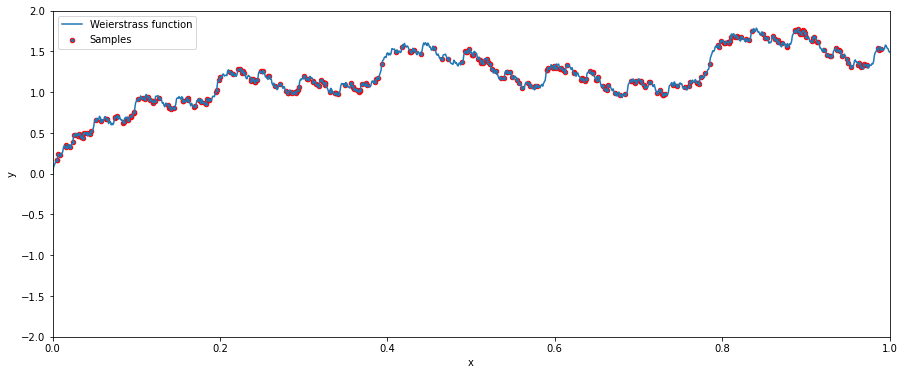

In [12]:
fig = plt.figure(figsize=(15, 6))
function_range = np.linspace(0, 1, 1000)
plt.plot(function_range, Weierstrass(x=function_range), label=r'Weierstrass function')
plt.scatter(x, y, edgecolor=r'r', s=20, label=r'Samples')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

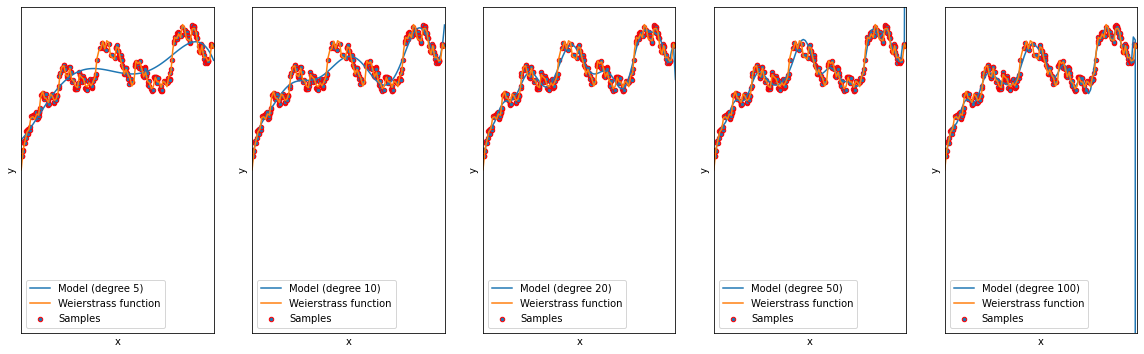

In [15]:
np.random.seed(42)
degrees = [5, 10, 20, 50, 100]
# Plot Weierstrass function and corresponding regression models.
plt.figure(figsize=(20, 6))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    # Fit a polynomial with respect to our sample data.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([(r'polynomial_features', polynomial_features),
    (r'linear_regression', linear_regression)])
    pipeline.fit(x[:, np.newaxis], y)
    # Create subplot and show result of currently fitted model.
    function_range = np.linspace(0, 1, 100)
    label = f'Model (degree {degrees[i]})'
    plt.plot(function_range, pipeline.predict(function_range[:, np.newaxis]),label=label)
    plt.plot(function_range, Weierstrass(function_range), label=r'Weierstrass function')
    plt.scatter(x, y, edgecolor=r'r', s=20, label=r'Samples')
    plt.xlabel(r'x')
    plt.ylabel(r'y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc=r'best')

Probably a Polynomia of Degree 20 fits the Weierstraß functions best.
Polynomial of Degree 5 and 10 seem to have a high bias and polynomials of degree 50 and 100 start to overfit (high variance).

Also note, i dont think using 300 samples is a good choice since the plots get very crowded.


# Exercise 6

- Read in the image 'horse.jpg' and turn it into a greyscale image
- Apply the following filters:
\begin{equation}G_x = \left( 
    \begin{array}{rrrrr}                                
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2
    \end{array}\right)
\end{equation}

\begin{equation}G_y = \left( 
    \begin{array}{rrrrr}                                
         -2 &  -2 &  -2 &  -2  &  -2  \\
         -1 &  -1 &  -1 &  -1  &  -1  \\
        0.0 & 0.0 & 0.0 & 0.0  & 0.0  \\
          1 &   1 &   1 &   1  &   1  \\
          2 &   2 &   2 &   2  &   2
    \end{array}\right)
\end{equation}

- Apply the ReLU activation function to "switch" pixels on and off
- Make a max pool operation with kernel-size 8
- Make 7 plots: the greyscale image, an image with $G_x$ applied, an image with $G_y$ applied, an image with $G_x$+ReLU, an iamge with $G_y$+ReLU, an image with $G_x$+ReLU+maxpool, and an iamge with $G_y$+ReLU+maxpool

In [ ]:
# your kernels/filters go here

In [ ]:
# your plotting code goes here

# Exercise 7

- Implement the following convolutional network architecture: <br>
1) one convolutional layer with 10 kernels and kernel size of 5 <br>
2) a ReLU activation function <br>
3) one pooling layer with which max pools out of 2 times 2 pixels <br>
4) one convolutional layer with 20 kernels and kernel size of 5 <br>
5) a ReLU activation function <br>
6) one pooling layer with which max pools out of 2 times 2 pixels <br>
7) one fully connected layer with 200 output units <br>
8) a ReLU activation function <br>
9) one fully connected layer with 200 input units and 10 output units <br><br>

- Run your CNN on the complete Fashion MNIST dataset for 5 epochs
- Report your results on the training set after each epoch
- Run you final model on the test set, also report you results

In [ ]:
class your_CNN(nn.Module):
    
    def __init__(self):
        super(your_CNN, self).__init__()
        
        # your layers go here 
        

    def forward(self, x):
        
        # your forward pass goes here
        
        return torch.log_softmax(x, dim=1)

In [ ]:
image_width = int(np.sqrt(len(fashion_mnist_train.iloc[0])))

# Create instance of Dataloader (training set).
fashion_mnist_loader_train = DataLoader(TensorDataset(
    torch.from_numpy(fashion_mnist_train.drop(columns=[r'item_type']).values.astype(
        dtype=np.float32)).unsqueeze(1).reshape(len(fashion_mnist_train), 1, image_width, image_width),
    torch.from_numpy(fashion_mnist_train[r'item_type'].values.astype(dtype=np.long))
), batch_size=128, shuffle=True, drop_last=False)

# Create instance of Dataloader (test set).
fashion_mnist_loader_test = DataLoader(TensorDataset(
    torch.from_numpy(fashion_mnist_test.drop(columns=[r'item_type']).values.astype(
        dtype=np.float32)).unsqueeze(1).reshape(len(fashion_mnist_test), 1, image_width, image_width),
    torch.from_numpy(fashion_mnist_test[r'item_type'].values.astype(dtype=np.long))
), batch_size=128, shuffle=False, drop_last=False)

In [ ]:
np.random.seed(42)
torch.manual_seed(42)

target_device = torch.device(r'cuda' if torch.cuda.is_available() else r'cpu')
cnn_model = your_CNN().to(target_device)
optimizer = optim.Adam(cnn_model.parameters(), lr=1e-3)

# your training and evaluation goes here
